In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

df = pd.read_excel('./cleaned_data.xlsx')

In [3]:
df.head()

,id,province_code,province_name,amphur_code,amphur_name,class_group_code,class_group_name,consumption,YYMM,status
0,5533,10,กรุงเทพมหานคร,1,พระนคร,4,ENTERTAIN,33640,2021-10-01,1
1,5534,10,กรุงเทพมหานคร,1,พระนคร,5,GOVERNMENT,46032,2021-10-01,1
2,5535,10,กรุงเทพมหานคร,1,พระนคร,6,INSTITUTION,4042,2021-10-01,1
3,5536,10,กรุงเทพมหานคร,1,พระนคร,7,CONSTRUCT,3210,2021-10-01,1
4,5580,10,กรุงเทพมหานคร,1,พระนคร,2,BUSINESS,232488,2021-10-01,1


In [4]:
df = df.replace(r'^\s*$', np.nan, regex=True)
cleaned_df = df.dropna(subset=['province_code','amphur_code'],how='any')
cleaned_df = cleaned_df.sort_values(['province_code', 'amphur_code', 'class_group_code', 'YYMM'],
              ascending = [True, True, True, True])
cleaned_df.head()

,id,province_code,province_name,amphur_code,amphur_name,class_group_code,class_group_name,consumption,YYMM,status
5,8213,10,กรุงเทพมหานคร,1,พระนคร,1,RESIDENCE,164415,2021-10-01,1
486,10614,10,กรุงเทพมหานคร,1,พระนคร,1,RESIDENCE,169733,2021-11-01,1
968,10539,10,กรุงเทพมหานคร,1,พระนคร,1,RESIDENCE,167071,2021-12-01,1
1449,9080,10,กรุงเทพมหานคร,1,พระนคร,1,RESIDENCE,168906,2022-01-01,1
1929,9703,10,กรุงเทพมหานคร,1,พระนคร,1,RESIDENCE,172480,2022-02-01,1


In [5]:
for i in range(len(cleaned_df)):
    cleaned_df['YYMM'][i] = cleaned_df['YYMM'][i].date().strftime("%m/%y")
cleaned_df.head()

d:\venv\general\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,province_code,province_name,amphur_code,amphur_name,class_group_code,class_group_name,consumption,YYMM,status
5,8213,10,กรุงเทพมหานคร,1,พระนคร,1,RESIDENCE,164415,10/21,1
486,10614,10,กรุงเทพมหานคร,1,พระนคร,1,RESIDENCE,169733,11/21,1
968,10539,10,กรุงเทพมหานคร,1,พระนคร,1,RESIDENCE,167071,12/21,1
1449,9080,10,กรุงเทพมหานคร,1,พระนคร,1,RESIDENCE,168906,01/22,1
1929,9703,10,กรุงเทพมหานคร,1,พระนคร,1,RESIDENCE,172480,02/22,1


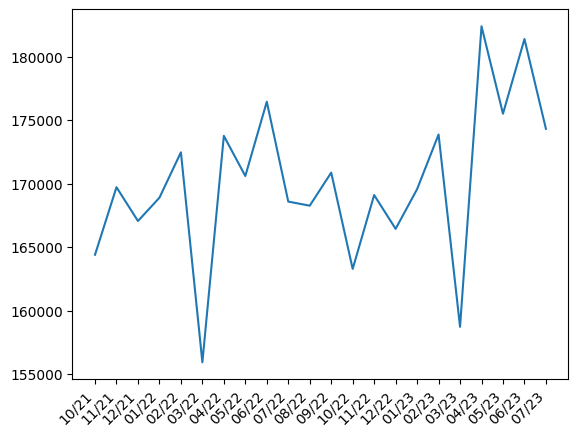

In [6]:
p10_a1_c_1 = cleaned_df.loc[(cleaned_df['province_code'] == 10) & (cleaned_df['amphur_code'] == 1) & (cleaned_df['class_group_code'] == 1)]

import matplotlib.pyplot as plt
plt.plot(p10_a1_c_1['YYMM'],p10_a1_c_1['consumption'])
plt.xticks(rotation=45, ha='right')
plt.show()

In [7]:
dataset = p10_a1_c_1[['consumption']].copy().reset_index(drop=True)
dataset.rename(columns = {'consumption': 'x'}, inplace = True)
dataset['y'] = dataset['x'].copy().shift(-1)
dataset = dataset[:-1]
dataset

,x,y
0,164415,169733.0
1,169733,167071.0
2,167071,168906.0
3,168906,172480.0
4,172480,155949.0
5,155949,173775.0
6,173775,170614.0
7,170614,176461.0
8,176461,168600.0
9,168600,168277.0


In [16]:
lag_range = 3

dataset_lag = p10_a1_c_1[['consumption']].copy().reset_index(drop=True)
dataset_lag.rename(columns = {'consumption': 'x'}, inplace = True)
for i in range(lag_range):
    dataset_lag['x'+str(i)] = dataset_lag['x'].copy().shift(-i)
dataset_lag['y'] = dataset_lag['x'].copy().shift(-(lag_range))
dataset_lag = dataset_lag[:-lag_range]
dataset_lag = dataset_lag.drop(columns='x')
dataset_lag

,x0,x1,x2,y
0,164415,169733.0,167071.0,168906.0
1,169733,167071.0,168906.0,172480.0
2,167071,168906.0,172480.0,155949.0
3,168906,172480.0,155949.0,173775.0
4,172480,155949.0,173775.0,170614.0
5,155949,173775.0,170614.0,176461.0
6,173775,170614.0,176461.0,168600.0
7,170614,176461.0,168600.0,168277.0
8,176461,168600.0,168277.0,170881.0
9,168600,168277.0,170881.0,163303.0
